In [ ]:
#Show Me the Money: Forecasting Economic Aid with Machine Learning
#Business Problem: Can USAID Economic Aid be predicted for a calendar year using historical Economic Disbursement data
# and World Bank Development Indicator of GNP Annual Growth %?

#Python 3.1 code by Laura Kahn & Majid Khorrami
#May 4, 2017

In [1]:
#Get the raw data
#USAID data and World Bank data

USAIDURL = 'https://explorer.usaid.gov/prepared/us_foreign_aid_country.xlsx'
WBURL = 'http://wdi.worldbank.org/table/1.1#'

In [11]:
#Alternative way of retrieving World Bank data is by making an API call
#Code adapted from: http://stackoverflow.com/questions/17301938/making-a-request-to-a-restful-api-using-python or 
#http://blog.danwin.com/examples-of-web-scraping-in-python-3-x-for-data-journalists/

#Return GDP Annual Growth rate for dates 2014-2016
#URL is http://api.worldbank.org/v2/en/country/all/indicator/NY.GDP.MKTP.KD.ZG?date=2014:2016
#Documentation for World Bank API: https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure

import requests, lxml, csv
import urllib.request
from urllib.request import urlopen

url = ("http://api.worldbank.org/countries/all/indicators/NY.GDP.MKTP.KD.ZG/?date=2014:2015&per_page=10000")
response = requests.get(url).text

print(response)

﻿<?xml version="1.0" encoding="utf-8"?>
<wb:data page="1" pages="1" per_page="10000" total="528" xmlns:wb="http://www.worldbank.org">
  <wb:data>
    <wb:indicator id="NY.GDP.MKTP.KD.ZG">GDP growth (annual %)</wb:indicator>
    <wb:country id="1A">Arab World</wb:country>
    <wb:date>2015</wb:date>
    <wb:value>3.19479966783148</wb:value>
    <wb:decimal>1</wb:decimal>
  </wb:data>
  <wb:data>
    <wb:indicator id="NY.GDP.MKTP.KD.ZG">GDP growth (annual %)</wb:indicator>
    <wb:country id="1A">Arab World</wb:country>
    <wb:date>2014</wb:date>
    <wb:value>2.74929122432054</wb:value>
    <wb:decimal>1</wb:decimal>
  </wb:data>
  <wb:data>
    <wb:indicator id="NY.GDP.MKTP.KD.ZG">GDP growth (annual %)</wb:indicator>
    <wb:country id="S3">Caribbean small states</wb:country>
    <wb:date>2015</wb:date>
    <wb:value>0.242432106737581</wb:value>
    <wb:decimal>1</wb:decimal>
  </wb:data>
  <wb:data>
    <wb:indicator id="NY.GDP.MKTP.KD.ZG">GDP growth (annual %)</wb:indicator>
    <wb

In [17]:
#Write World Bank response text to file
fo = open(r'C:\\Users\lkahn\Documents\526-AppliedMachineLearning\response.xml', 'w',encoding='utf-8' ) 
fo.write(response) 

136564

In [39]:
#Save output from API call to XML File
#Code adapted from: http://stackoverflow.com/questions/3605680/creating-a-simple-xml-file-using-python

import xml.etree.cElementTree as ET
from lxml import etree
import pandas as pd

xml_data = 'C:\\Users\lkahn\Documents\526-AppliedMachineLearning\response.xml'
def xml2df(xml_data):
    #Initiates the tree
    tree = ET.parse(xml_data)
    root = tree.getroot()
    #This is our record list which we will convert into a dataframe
    all_records = []
    #This is subchildren tags which will be parsed and appended here
    headers = []
    #Begin a loop through our root tree
    for i, child in enumerate(root):
        record = []
        for subchild in child:
            record.append(subchild.text)
            #Check the header list to see if the subchild tag <ID>, <String> is in the headers field. If not, append it.
            #This will be used for our headers
            if subchild.tag not in headers:
                headers.append(subchild.tag)
        #Append this record to all_records
        all_records.append(record)
    df=pd.DataFrame(all_records, columns=headers)
    with open('C:/Users/lkahn/Documents/526-AppliedMachineLearning/response.xml', 'a') as f:
        df.to_csv(f)
        return df
    #Finally, return our Pandas dataframe with headers in the column.
        xml2df(xml_data)

In [ ]:
#Delete unnecessary columns from WB dataframe 'Country Code", "Indicator Name', 'Indicator Code', '1960', '1961'...etc to '2012'
df = df.drop('columnname', axis=1, inplace=True)

In [ ]:
#Delete unnecessary columns from USAID dataframe
#'country_id', 'country_code', 'region_id', 'region_name', 'assistance_category_id', 'assistance_category_name"='Military',
#transaction_type_id', #'transaction_type_name'='Obligations', 'fiscal_year' of 1950-2013, and 'constant_amount'


In [ ]:
#Merge USAID and World Bank data frames into 1 data frame

In [ ]:
#Data Preprocessing
#We need to encode aid amount features - transform numerical features to get boolean values

#EXAMPLES OF ONE HOT ENCODING for FEATURE CATEGORIZATION
#http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
#See http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing 4.3.4 ;
#See https://gist.github.com/ramhiser/982ce339d5f8c9a769a0 for more information;
#See http://stackoverflow.com/questions/34170413/possible-ways-to-do-one-hot-encoding-in-scikit-learn
#If Amount is >10,000,000, then 1, else encode with 0 value
#Do this encoding with years 2014 and 2015


In [5]:
import os
os.getcwd()

'C:\\Users\\lkahn\\Documents\\526-AppliedMachineLearning'

In [8]:
#Import cleaned data manually from CSV
import csv
import pandas as pd

df = pd.DataFrame()
df = pd.read_csv('aid-cleaned2.csv', index_col=0)
df

,2014.00,2015.00,2016.00,WB 2015 GDP-growth annual %
Country,,,,
Afghanistan,2202642037,2224419103,1263122571,-1.9466
Albania,21502503,18553548,11788431,2.9597
Algeria,7494186,7504667,1983881,3.9000
Angola,67107300,61494920,52439601,3.0070
Antigua and Barbuda,NaN,14130,3780,4.1270
Argentina,1946256,1825092,NaN,2.3723
Armenia,37272007,39333349,24089150,3.0000
Azerbaijan,27489691,22512506,11170994,1.1000
Bahamas,1305824,767064,51562,-1.6636


In [9]:
df.dtypes

2014.00                        float64
2015.00                        float64
2016.00                        float64
WB 2015 GDP-growth annual %    float64
dtype: object

In [12]:
import scipy.stats as stats
df.describe()

,2014.00,2015.00,2016.00,WB 2015 GDP-growth annual %
count,1.750000e+02,1.750000e+02,1.420000e+02,170.000000
mean,1.081908e+08,1.120423e+08,9.156046e+07,2.732453
std,2.313958e+08,2.452112e+08,1.682427e+08,4.689659
min,3.098000e+03,4.928000e+03,-1.088240e+05,-28.096800
25%,1.957157e+06,1.920501e+06,1.227691e+06,1.337550
50%,2.178154e+07,1.911064e+07,1.997031e+07,3.013450
75%,1.114944e+08,9.202583e+07,1.206614e+08,4.768475
max,2.202642e+09,2.224419e+09,1.263123e+09,26.276100


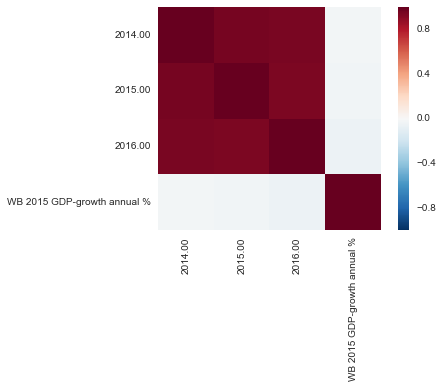

In [11]:
#Let's explore the correlation between the different features in the columns
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it as a heatmap
encoded_data, _ = number_encode_features(df)
sns.heatmap(df.corr(), square=True)
plt.show()

In [16]:
df_clean = df.dropna()
df_clean.head(n=5)

,2014.00,2015.00,2016.00,WB 2015 GDP-growth annual %
Country,,,,
Afghanistan,2202642037,2224419103,1263122571,-1.9466
Albania,21502503,18553548,11788431,2.9597
Algeria,7494186,7504667,1983881,3.9000
Angola,67107300,61494920,52439601,3.0070
Armenia,37272007,39333349,24089150,3.0000


In [29]:
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics

#Define X, Y variables
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ['2014.00']], 
    encoded_data['2014.00'], train_size=0.80)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [7]:
#Let's try to predict the actual value of the target variable, '2017 Predicted Aid Amount'

#Define the features by year
feats = df 
new_feats = '2017 Predicted Aid Amount'
col = df[0:2]

if feats.item > 10000000:
    new_feats[col] = 1
else: new_feats[col] = 0

AttributeError: 'DataFrame' object has no attribute 'item'

In [68]:
#Create a list of lists
import csv
with open ('aid-cleaned2.csv', 'r') as f:
    reader = csv.reader(f)
    mylistoflists = list(reader)
print(mylistoflists[1:])

[['Afghanistan', '2,202,642,037', '2,224,419,103', '1,263,122,571', '-1.9466'], ['Albania', '21,502,503', '18,553,548', '11,788,431', '2.9597'], ['Algeria', '7,494,186', '7,504,667', '1,983,881', '3.9'], ['Angola', '67,107,300', '61,494,920', '52,439,601', '3.007'], ['Antigua and Barbuda', '', '14,130', '3,780', '4.127'], ['Argentina', '1,946,256', '1,825,092', '', '2.3723'], ['Armenia', '37,272,007', '39,333,349', '24,089,150', '3'], ['Azerbaijan', '27,489,691', '22,512,506', '11,170,994', '1.1'], ['Bahamas', '1,305,824', '767,064', '51,562', '-1.6636'], ['Bahrain', '626,968', '1,259,711', '', '2.863'], ['Bangladesh', '261,713,436', '250,830,290', '222,750,371', '6.5526'], ['Barbados', '69,808', '208,240', '4,593', '0.8824'], ['Belarus', '15,088,903', '17,390,445', '8,505,418', '-3.8877'], ['Belgium', '2,100,238', '5,775,753', '', '1.5002'], ['Belize', '2,289,513', '1,837,129', '288,971', '1.0438'], ['Benin', '25,179,853', '52,991,568', '33,173,074', '2.0945'], ['Bhutan', '327,412', '

In [10]:
#Now we need to encode categorical integer features with one-hot encoding
#Import LabelEncoder and initialize it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Iterate over all columns in training and test set
for col in X_test.columns.values:
    #Encoding only categorical variables
    if X_test[col].dtypes=='object':
        #Using whole data to form an exhaustive list of lvels
        data = X_train[col].append(X_test[col])
    le.fit(data.values)
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

NameError: name 'X_test' is not defined